# 1 Introduction

This EDA explores the data available for the Tabular Playground Series - October 2022 competition. Simple data exploration is performed, as well as preliminary modeling.

In [1]:
import pandas as pd
import numpy as np
import gc

# 1.1 Overall Dataset Impressions

Let's start by looking only at one training file first. As indicated, we'll use the dataframe type file to format the Pandas dataframe so that we don't waste memory using `float64` values for every numeric we see.

In [2]:
dtypes = pd.read_csv("../input/tabular-playground-series-oct-2022/train_dtypes.csv")
dtype_dict = {k: v for (k, v) in zip(dtypes.column, dtypes.dtype)}
train = pd.read_csv("../input/tabular-playground-series-oct-2022/train_0.csv", dtype=dtype_dict)
train = train.append(pd.read_csv("../input/tabular-playground-series-oct-2022/train_1.csv", dtype=dtype_dict))
train = train.append(pd.read_csv("../input/tabular-playground-series-oct-2022/train_2.csv", dtype=dtype_dict))
train = train.append(pd.read_csv("../input/tabular-playground-series-oct-2022/train_3.csv", dtype=dtype_dict))
train = train.append(pd.read_csv("../input/tabular-playground-series-oct-2022/train_4.csv", dtype=dtype_dict))
train = train.append(pd.read_csv("../input/tabular-playground-series-oct-2022/train_5.csv", dtype=dtype_dict))
train = train.append(pd.read_csv("../input/tabular-playground-series-oct-2022/train_6.csv", dtype=dtype_dict))
train = train.append(pd.read_csv("../input/tabular-playground-series-oct-2022/train_7.csv", dtype=dtype_dict))
train = train.append(pd.read_csv("../input/tabular-playground-series-oct-2022/train_8.csv", dtype=dtype_dict))
train = train.append(pd.read_csv("../input/tabular-playground-series-oct-2022/train_9.csv", dtype=dtype_dict))
test = pd.read_csv("../input/tabular-playground-series-oct-2022/test.csv", dtype=dtype_dict)

train

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,...,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,1,1002,-33.313030,-0.000000,0.000000,1.854800,-0.000000,0.0000,0.000000,41.804798,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3,B,0,0
1,1,1002,-33.206146,-0.000000,0.000000,1.854800,-0.000000,0.0000,0.000000,42.261600,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3,B,0,0
2,1,1002,-33.098114,-0.000000,0.000000,1.854800,-0.000000,0.0000,0.000000,43.227001,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3,B,0,0
3,1,1002,-32.993191,-0.000000,0.000000,1.854800,-0.000000,0.0000,0.000000,43.898399,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3,B,0,0
4,1,1002,-32.887756,-0.000000,0.000000,1.854800,-0.000000,0.0000,0.000000,44.960602,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3,B,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102808,7365,7365007,-0.450079,-49.694599,-97.544006,34.628201,27.446001,9.7956,-6.577000,-79.632996,...,-8.210938,-5.937500,-6.925781,-8.531250,0.0,-1.918945,-1,NaN,0,0
2102809,7365,7365007,-0.344710,-46.954601,-96.565994,33.901199,27.362000,9.7644,-7.854400,-77.739197,...,-8.109375,-5.832031,-6.824219,-8.421875,0.0,-1.815430,-1,NaN,0,0
2102810,7365,7365007,-0.242408,-44.677597,-95.753395,33.197800,27.292000,9.7384,-8.915600,-74.831802,...,-8.007812,-5.730469,-6.722656,-8.320312,0.0,-1.712891,-1,NaN,0,0
2102811,7365,7365007,-0.138584,-41.272999,-94.538795,31.977400,27.187000,9.6994,-10.502600,-73.208595,...,-7.902344,-5.625000,-6.617188,-8.218750,0.0,-1.609375,-1,NaN,0,0


It can be helpful to see what kind of shape we're dealing with for the data itself. This is already described in the competition rules and data description, but sometimes it helps to see the raw numbers.

In [3]:
def cat_column_info(column):
    num_categories = train[column].nunique()
    print("------> {} <------".format(column))
    print("--: train - type {}".format(train[column].dtype))
    print("--: test  - type {}".format(test[column].dtype))
    print("--: train - # categories {}".format(train[column].nunique()))
    print("--: test  - # categories {}".format(test[column].nunique()))
    if num_categories < 10:
        if train[column].dtype == "int64":
            print("--: train - values {}".format(np.sort(train[column].unique())))
            print("--: test  - values {}".format(np.sort(test[column].unique())))
        else:
            print("--: train - values {}".format(train[column].unique()))
            print("--: test  - values {}".format(test[column].unique()))
    print("--: train - NaN count {}".format(train[column].isnull().values.sum()))
    print("--: test  - NaN count {}".format(test[column].isnull().values.sum()))
    print("")

def cont_column_info(column):
    print("------> {} <------".format(column))
    print("--: train - type {}".format(train[column].dtype))
    print("--: test  - type {}".format(test[column].dtype))
    print("--: train - min {}".format(train[column].min()))
    print("--: test  - min {}".format(test[column].min()))
    print("--: train - max {}".format(train[column].max()))
    print("--: test  - max {}".format(test[column].max()))    
    print("--: train - NaN count {}".format(train[column].isnull().values.sum()))
    print("--: test  - NaN count {}".format(test[column].isnull().values.sum()))
    print("")
    
print(": Train set shape {}".format(train.shape))
print(": Test set shape {}".format(test.shape))
print("")

: Train set shape (21198036, 61)
: Test set shape (701143, 55)



Our input data consists of:

* `train.csv` - 9 GB in size, containing 61 columns and 21,198,036 rows
* `test.csv` - 287 MB in size, containing 55 columns and 701,143 rows

One main observation here is the sheer size of the data we are looking at. According to Jupyter notebook memory usage, the full training dataset exerts a memory pressure of 7.10 GB when loaded with the correct data types. While this fits in Kaggle's CPU memory allotment, model training will exert more pressure on the Kaggle 16 GB CPU memory and GPU memory limitations. We should definitely explore what column formats are at play, and whether we can reduce memory pressure by compressing or dropping data as required.

---

# 2 Features

Let's take a deeper dive on some of the particulars relating to the features in the dataset.

# 2.1 Null Values

Let's explore the issue of missing values in the dataset to see if there are systemic problems with data representation.

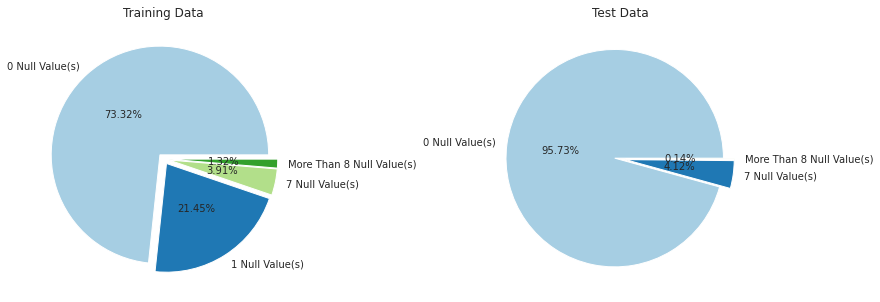

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns_params = {"palette": "dark"}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

train["null_count"] = train.isnull().sum(axis=1)
counts = train.groupby("null_count")["event_id"].count().to_dict()
null_data = {"{} Null Value(s)".format(k) : v for k, v in counts.items() if k < 8}
null_data["More Than 8 Null Value(s)"] = sum([v for k, v in counts.items() if k >= 8])

_ = axs[0].pie(
    x=list(null_data.values()), 
    autopct="%.2f%%", 
    explode=[0.05] * len(null_data.keys()), 
    labels=null_data.keys(), 
    pctdistance=0.5, 
    colors=sns.color_palette("Paired")[0:5]
)
_ = axs[0].set_title("Training Data")

test["null_count"] = test.isnull().sum(axis=1)
counts = test.groupby("null_count")["p5_vel_x"].count().to_dict()
null_data = {"{} Null Value(s)".format(k) : v for k, v in counts.items() if k < 8}
null_data["More Than 8 Null Value(s)"] = sum([v for k, v in counts.items() if k >= 8])

_ = axs[1].pie(
    x=list(null_data.values()), 
    autopct="%.2f%%", 
    explode=[0.05] * len(null_data.keys()), 
    labels=null_data.keys(), 
    pctdistance=0.5, 
    colors=sns.color_palette("Paired")[0:5]
)
_ = axs[1].set_title("Test Data")

A few observations:

* In the training set, there are occurrences of single null value features that appear roughly 22% of the data set. This same instance of a single null value does not occur in the testing set. We need to dig into the null value appearances to find out why there is a difference.
* Otherwise, it looks like we have null values that impact around 5% of the records we have available for training and testing.

Let's dig into the training set and see where the null values are occurring.

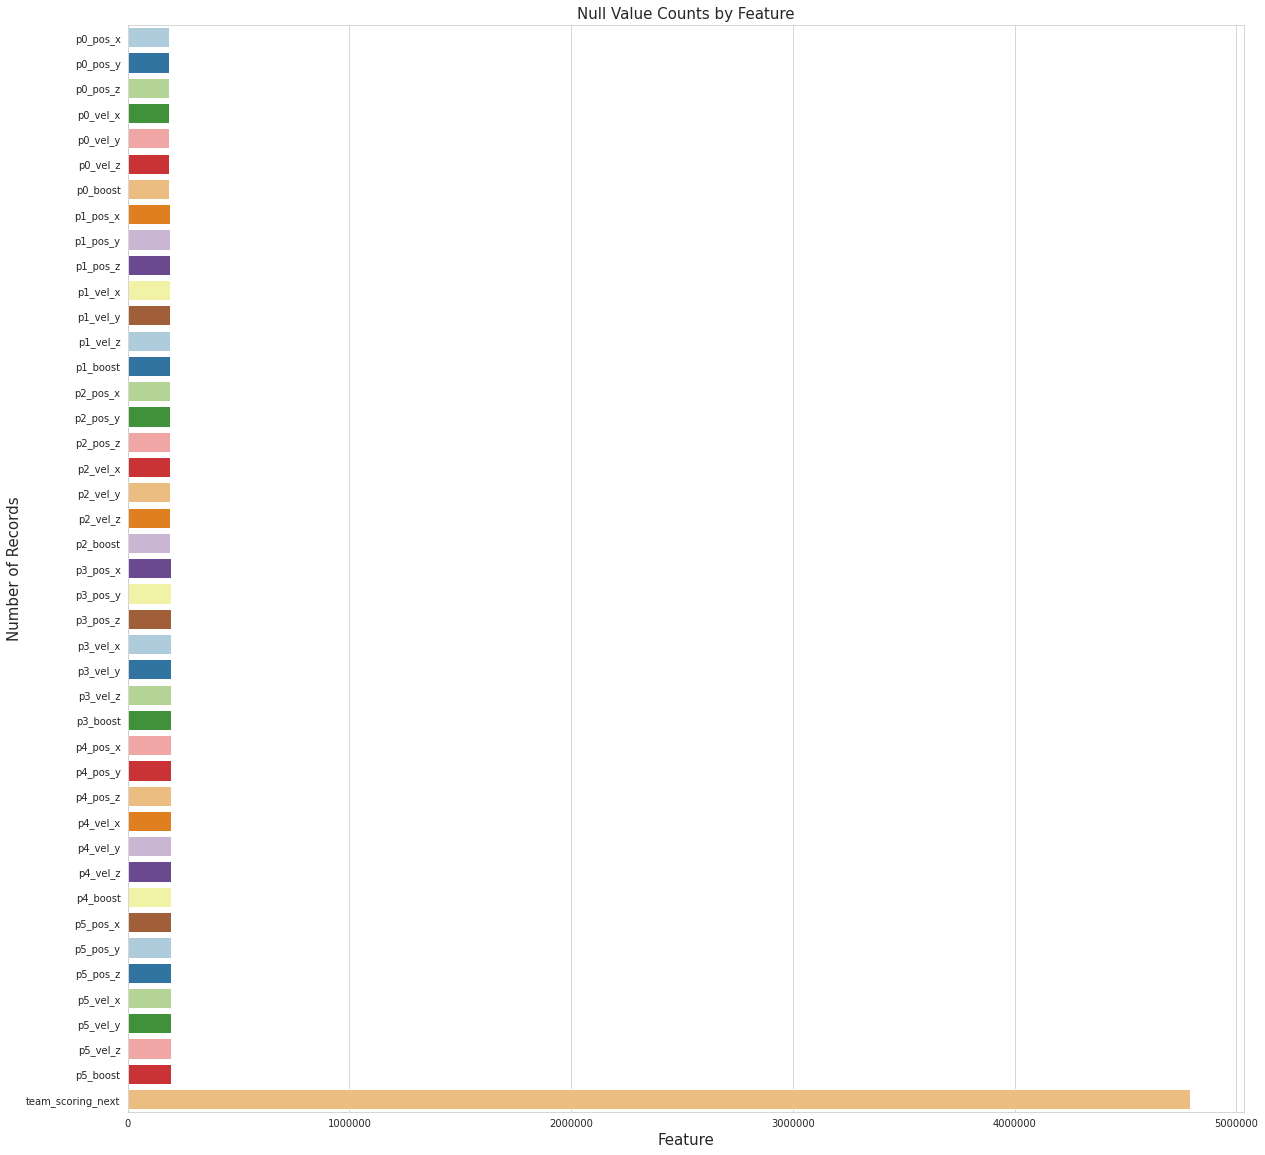

In [5]:
# Look at the rows that have NaN values, and count up how many occur
null_rows = train[(train["null_count"] > 0)]
nulls = {}
for feature in null_rows.columns:
    if null_rows[feature].isnull().any():
        nulls[feature] = np.count_nonzero(null_rows[feature].isnull().values)
        
# Plot out the counts of each 
keys = [key for key in nulls.keys()]
values = [int(nulls[key]) for key in keys]

f, ax = plt.subplots(figsize=(20, 20))
ax = sns.barplot(x=values, y=keys, palette=sns.color_palette("Paired")[0:len(keys)])
_ = ax.set_title("Null Value Counts by Feature", fontsize=15)
_ = ax.set_ylabel("Number of Records", fontsize=15)
_ = ax.set_xlabel("Feature", fontsize=15)
_ = plt.ticklabel_format(style='plain', axis='x')

A few things appear to be going on here.  

* As described by the competition, `team_scoring_next` will be a null value if neither team ends up scoring within the bounds of the game sequence. So somewhere around 22% of our data available for training represents game sequences where neither team scores. Overall, this may end up skewing our data slightly, however, the impact may be negligible when we look at the number of records that a team scores within the next 10 seconds versus the number of records where no scoring is occurring (more on this later).
* The `team_scoring_next` field is only part of the training set (i.e. it is a target feature). Since the testing set does not have this field, this explains the null count disparity between the training and testing sets. 

There is an interesting phenomenon occurring with player position, velocity, and boost time features. Let's isolate a single player and look at the number of null values across positions and velocities. Let's look at player 5:

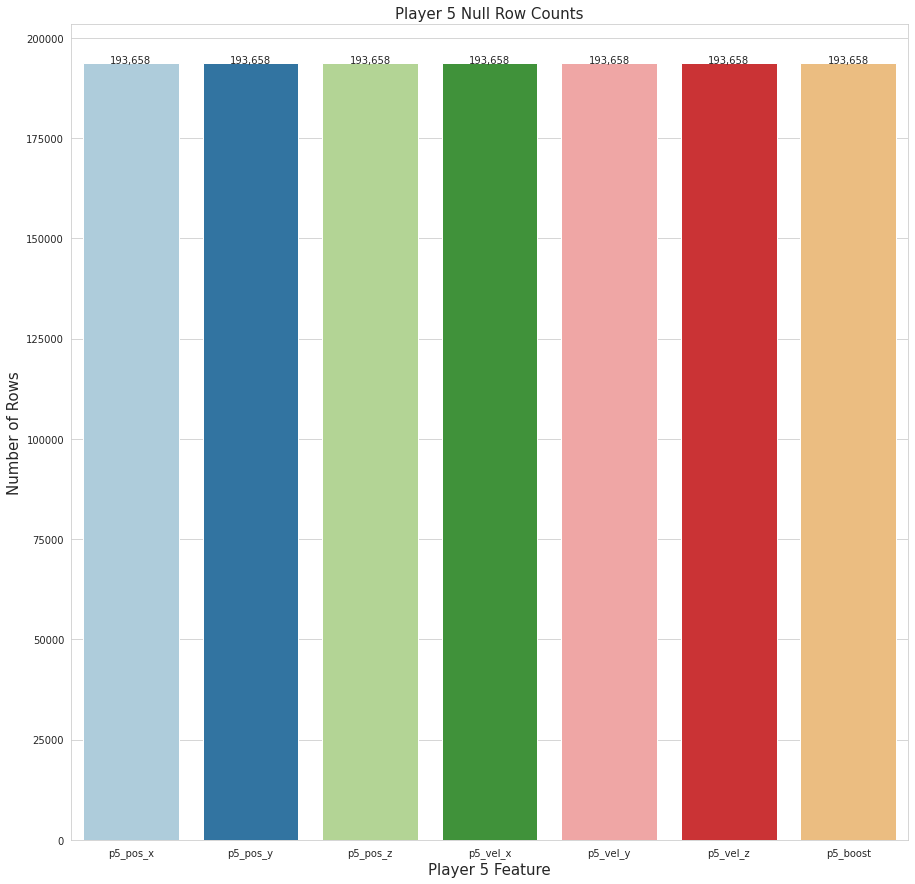

In [6]:
# Plot out the nulls for player 5 only 
keys = [key for key in nulls.keys() if key.startswith("p5")]
values = [int(nulls[key]) for key in keys]

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.barplot(y=values, x=keys, palette=sns.color_palette("Paired")[0:len(keys)])
for p in ax.patches:
    ax.text(x=p.get_x()+(p.get_width()/2), y=p.get_height(), s="{:,d}".format(round(p.get_height())), ha="center")
_ = ax.set_title("Player 5 Null Row Counts", fontsize=15)
_ = ax.set_ylabel("Number of Rows", fontsize=15)
_ = ax.set_xlabel("Player 5 Feature", fontsize=15)

As observed, we can see the number of rows impacted by null values is the same for each player 5 feature. The question is whether or not these features are null at the same (i.e. position, velocity, and boost are all null at the same time), or if the nulls can appear in a single feature independently of the other null values (i.e. can `p5_vel_x` be null but `p5_vel_y` be not null in the same row). A simple query will tell us. We'll isolate player 5 statistics, and select any row that has a null in any column.

In [7]:
player_5_features = [feature for feature in train.columns if feature.startswith("p5")]
player_5 = train[player_5_features]
player_5[player_5.isnull().any(axis=1)]

,p5_pos_x,p5_pos_y,p5_pos_z,p5_vel_x,p5_vel_y,p5_vel_z,p5_boost
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2101954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101957,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above query, we see there are 193,658 rows that have at least 1 null value in it. As you can see from the resultant dataframe, all the player statistics are null at the same time. Since there are only 193,658 rows in the dataframe, and each statistic shows null 193,658 times, we can conclude that when one statistic value is missing, then all of them are missing at the same time.

The question is why? The answer is of course related to certain _gameplay mechanics_. In Rocket League, ramming a player at supersonic speeds will temporarily demolish that player. In essence, the player is removed from gameplay for a certain amount of time. The null values indicate moments in time when player 5 has been demolished. So, the null values are not due to missing data, but rather a player that has been removed from the active board.

For the purposes of our analysis, we'll have to fill in missing values with something. With player positions, we can fill in missing values with a value that exists outside the scope of the playing field. For velocities, we'll set them to zero.

### Key Observations About Null Values

* Null values in the `team_scoring_next` feature are expected, since there are training examples where no team scores a point. It may make sense to one-hot encode the field into `team_a_scores_next` and `team_b_scores_next` so that the nulls are translated into `0` values for both fields when a null is encountered.
* Null values in the player statistic features happen when a player has been demolished from the field. We should probably create a new binary feature called `pX_demolished` to indicate that player `X` has been removed from gameplay, and then fill the missing statistic values with a large or small numbers to indicate that they are no longer in the play area. This will stop problems that may arise with nulls in our dataset and various machine learning algorithms.

In [8]:
# Clean up unused variables to save RAM
import gc

del(keys)
del(values)
del(nulls)
del(null_data)
del(counts)
del(test)
del(player_5_features)
del(player_5)
_ = gc.collect()

# 2.2 Playing Field Definition

One of the things we need to do is determine where the goal areas are located. We can do so by looking at event times in the training set and see where the ball position is at the end of the event sequence. If we combine this with the `team_scoring_next` feature, we can determine whether a goal was scored. This should hopefully show us where in three dimensional space the goals exist.One of the things we need to do is determine where the goal areas are located. We can do so by looking at event times in the training set and see where the ball position is at the end of the event sequence. If we combine this with the `team_scoring_next` feature, we can determine whether a goal was scored. This should hopefully show us where in three dimensional space the goals exist.

There are a number of fields that refer to the position of both the players, and the ball within the play field area. Let's take a look at how the field is laid out.

In [9]:
y_features = [feature for feature in train.columns if feature.endswith("pos_y")]
x_features = [feature for feature in train.columns if feature.endswith("pos_x")]
z_features = [feature for feature in train.columns if feature.endswith("pos_z")]

x_max = -999
x_min = 999
for x_feature in x_features:
    max_val = train[x_feature].max()
    min_val = train[x_feature].min()
    x_max = max_val if max_val > x_max else x_max
    x_min = min_val if min_val < x_min else x_min

y_max = -999
y_min = 999
for y_feature in y_features:
    max_val = train[y_feature].max()
    min_val = train[y_feature].min()
    y_max = max_val if max_val > y_max else y_max
    y_min = min_val if min_val < y_min else y_min

z_max = -999
z_min = 999
for z_feature in z_features:
    max_val = train[z_feature].max()
    min_val = train[z_feature].min()
    z_max = max_val if max_val > z_max else z_max
    z_min = min_val if min_val < z_min else z_min

print(": X coordinate ranges from {} to {}".format(x_min, x_max))
print(": Y coordinate ranges from {} to {}".format(y_min, y_max))
print(": Z coordinate ranges from {} to {}".format(z_min, z_max))

: X coordinate ranges from -82.1969985961914 to 82.06820678710938
: Y coordinate ranges from -119.91820526123047 to 119.91580200195312
: Z coordinate ranges from -0.2054000049829483 to 40.90520095825195


This tells us that we have a play area that is 164 units wide, 240 units long, and 40 units tall. The question is where the goal areas are located. Let's generate a heatmap of the are and plot where the players and balls can end up. For the sake of the heatmap, we'll translate the floats into integers, since we aren't too concerned where within a cubic unit of area the ball or player is, just that it ends up there. We'll stick to X and Y positions for now. We'll also adjust the heatmap such that it plots X coordinates from 0 to 164, and Y coordinates from 0 to 240.

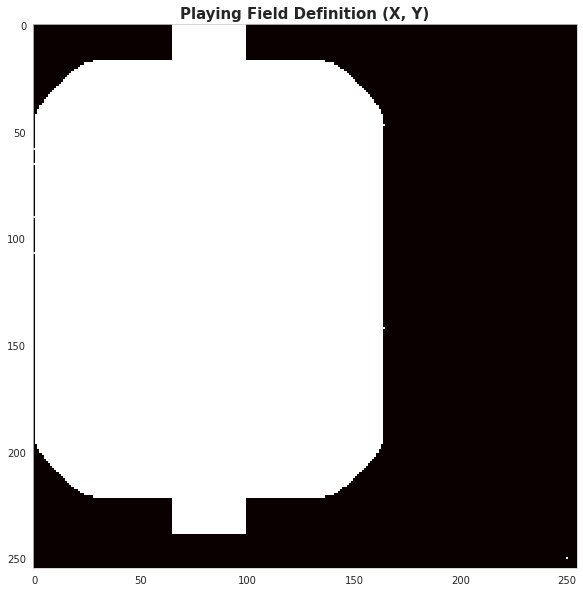

In [10]:
import matplotlib.pyplot as plt
import numpy as np

for feature in y_features:
    train[feature] = train[feature].fillna(250).astype(np.int16)
    train[feature] = train[feature].apply(lambda x: x + 119 if x != 250 else x)
    train[feature] = train[feature].astype(np.uint8)

for feature in x_features:
    train[feature] = train[feature].fillna(250).astype(np.int16)
    train[feature] = train[feature].apply(lambda x: x + 82 if x != 250 else x)
    train[feature] = train[feature].astype(np.uint8)
    
for feature in z_features:
    train[feature] = train[feature].fillna(250).astype(np.int16)
    train[feature] = train[feature].astype(np.uint8)
    
valid_positions = set()

xy_features = [
    "p0_pos_x", "p0_pos_y", "p1_pos_x", "p1_pos_y", "p2_pos_x", "p2_pos_y", "p3_pos_x", "p3_pos_y", 
    "p4_pos_x", "p4_pos_y", "p5_pos_x", "p5_pos_y", "ball_pos_x", "ball_pos_y"
]

for (_, p0_x, p0_y, p1_x, p1_y, p2_x, p2_y, p3_x, p3_y, p4_x, p4_y, p5_x, p5_y, ball_x, ball_y) in train[xy_features].itertuples():
    valid_positions.add((p0_x, p0_y))
    valid_positions.add((p1_x, p1_y))
    valid_positions.add((p2_x, p2_y))
    valid_positions.add((p3_x, p3_y))
    valid_positions.add((p4_x, p4_y))
    valid_positions.add((p5_x, p5_y))
    valid_positions.add((ball_x, ball_y))

np_array = np.zeros(shape=(255, 255))
for (x, y) in valid_positions:
    np_array[y, x] += 1
    
f, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np_array, cmap='hot', interpolation='nearest')
_ = ax.grid(False)
_ = ax.set_title("Playing Field Definition (X, Y)", fontweight="bold", size=15)

# Clean up unused variables to save on RAM
del(valid_positions)
del(xy_features)
del(np_array)
_  = gc.collect()

From this particular map, we can see quite well where the two goal areas are located - on the north and south ends of the field. Let's take a look at a 3-dimensional representation of the playing field.

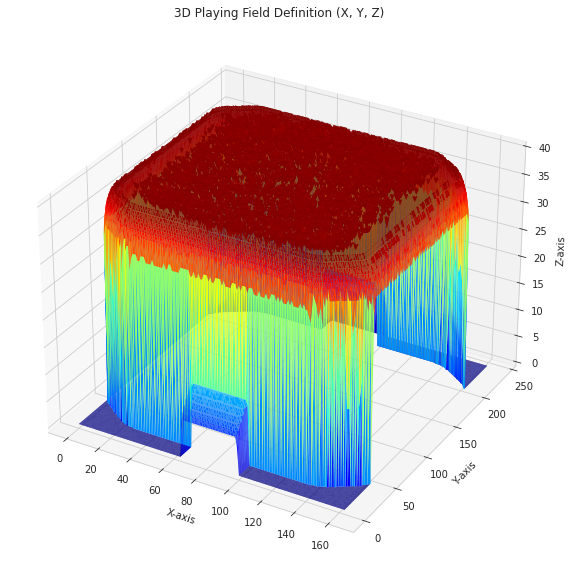

In [11]:
import gc

valid_positions = set()
gc.collect()

xyz_features = [
    "p0_pos_x", "p0_pos_y", "p0_pos_z", "p1_pos_x", "p1_pos_y", "p1_pos_z", "p2_pos_x", "p2_pos_y", "p2_pos_z", 
    "p3_pos_x", "p3_pos_y", "p3_pos_z", "p4_pos_x", "p4_pos_y", "p4_pos_z", "p5_pos_x", "p5_pos_y", "p5_pos_z", 
    "ball_pos_x", "ball_pos_y", "ball_pos_z"
]

for (_, p0_x, p0_y, p0_z, p1_x, p1_y, p1_z, p2_x, p2_y, p2_z, p3_x, p3_y, p3_z, p4_x, p4_y, p4_z, p5_x, p5_y, p5_z, ball_x, ball_y, ball_z) in train[xyz_features].itertuples():
    valid_positions.add((p0_x, p0_y, p0_z))
    valid_positions.add((p1_x, p1_y, p1_z))
    valid_positions.add((p2_x, p2_y, p2_z))
    valid_positions.add((p3_x, p3_y, p3_z))
    valid_positions.add((p4_x, p4_y, p4_z))
    valid_positions.add((p5_x, p5_y, p5_z))
    valid_positions.add((ball_x, ball_y, ball_z))
    
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

x = []
y = []
z = []

xyz_max_data = dict()
for (px, py, pz) in valid_positions:
    if px not in xyz_max_data:
        xyz_max_data[px] = dict()
    if py not in xyz_max_data[px]:
        xyz_max_data[px][py] = pz
    elif pz > xyz_max_data[px][py]:
        xyz_max_data[px][py] = pz

for px in range(164):
    for py in range(240):
        x.append(px)
        y.append(py)
        z.append(xyz_max_data[px][py] if px in xyz_max_data and py in xyz_max_data[px] else 0)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0)
  
ax.set_title("3D Playing Field Definition (X, Y, Z)")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Clean up unused variables to save on RAM
del(valid_positions)
del(xyz_features)
_  = gc.collect()

plt.show()

Here we can clearly see the goal areas defined at the north and south ends of the field. The goal openings themselves are quite narrow, and taper off. Their Z position opening occurs at roughly 13 units high, and is a narrow opening of roughly 20 units. 

### Key Observations About Playing Field

* The goal areas are to the north and south of the field.
* The opening of the goal area appears to be roughly 20 units wide, by 13 units high.
* Sides of the playing area are all curved.

# 2.3 Player Positions

Now that we know what the field looks like, we need to know which end of the field belongs to which team. In other words, is team A trying to score goals on the net to the north or the south? We find out this information by looking at the ball position when team A scores, and when team B scores. Most of the time the players will be near the net which is under their control when they are defending. Let's take a closer look.

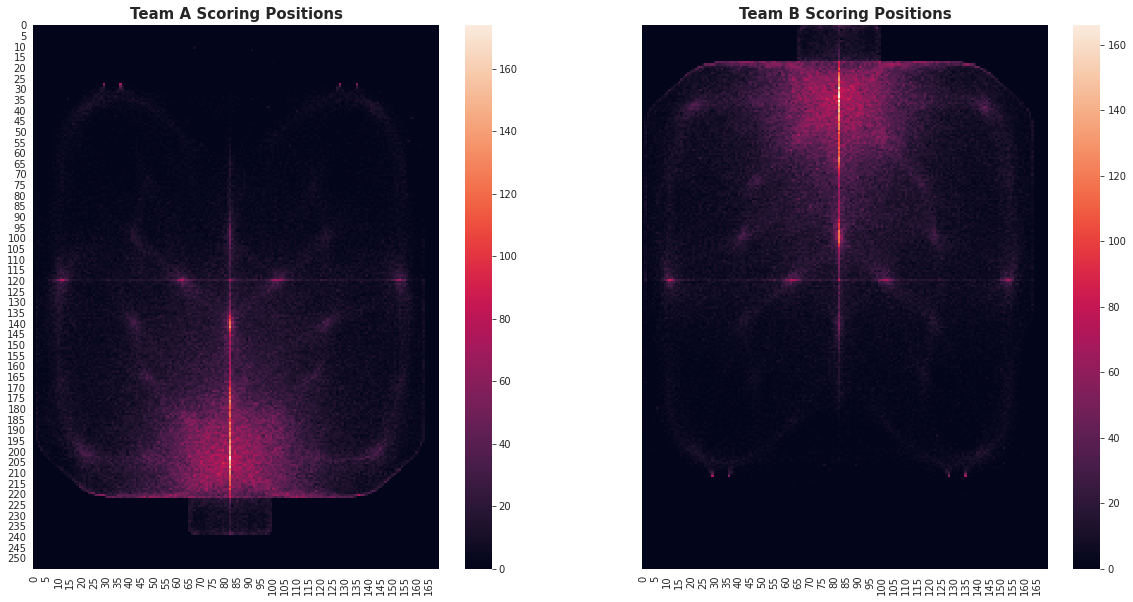

In [12]:
xy_features = [
    "p0_pos_x", "p0_pos_y", "p1_pos_x", "p1_pos_y", "p2_pos_x", "p2_pos_y", "p3_pos_x", "p3_pos_y", 
    "p4_pos_x", "p4_pos_y", "p5_pos_x", "p5_pos_y", "ball_pos_x", "ball_pos_y"
]

train_a_near_scoring_net = train[(train["team_A_scoring_within_10sec"] == 1) & (train["event_time"] > -1.)]

valid_positions = []

for (_, p0_x, p0_y, p1_x, p1_y, p2_x, p2_y, p3_x, p3_y, p4_x, p4_y, p5_x, p5_y, ball_x, ball_y) in train_a_near_scoring_net[xy_features].itertuples():
    if p0_x < 250:
        valid_positions.append((p0_x, p0_y))
    if p1_x < 250:
        valid_positions.append((p1_x, p1_y))
    if p2_x < 250:
        valid_positions.append((p2_x, p2_y))
    # valid_positions.append((ball_x, ball_y))

np_array = np.zeros(shape=(255, 170))
for (x, y) in valid_positions:
    np_array[y, x] += 1.

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

_ = sns.heatmap(np_array, ax=axs[0])
_ = axs[0].grid(False)
_ = axs[0].set_title("Team A Scoring Positions", fontweight="bold", size=15)

# Clean up unused variables to save on RAM
del(valid_positions)
del(np_array)
del(train_a_near_scoring_net)
_  = gc.collect()

train_b_near_scoring_net = train[(train["team_B_scoring_within_10sec"] == 1) & (train["event_time"] > -1.)]

valid_positions = []

for (_, p0_x, p0_y, p1_x, p1_y, p2_x, p2_y, p3_x, p3_y, p4_x, p4_y, p5_x, p5_y, ball_x, ball_y) in train_b_near_scoring_net[xy_features].itertuples():
    if p3_x < 250:
        valid_positions.append((p3_x, p3_y))
    if p4_x < 250:
        valid_positions.append((p4_x, p4_y))
    if p5_x < 250:
        valid_positions.append((p5_x, p5_y))
    # valid_positions.append((ball_x, ball_y))

np_array = np.zeros(shape=(255, 170))
for (x, y) in valid_positions:
    np_array[y, x] += 1.
    
_ = sns.heatmap(np_array, ax=axs[1])
_ = axs[1].grid(False)
_ = axs[1].set_title("Team B Scoring Positions", fontweight="bold", size=15)

# Clean up unused variables to save on RAM
del(valid_positions)
del(xy_features)
del(np_array)
del(train_b_near_scoring_net)
_  = gc.collect()

From the above, we can see that team A is trying to score on the net closest to the 250 Y position. Team B is trying to score on the net closest to the 0 Y position. We can also take a look at the opposite - where team B is defending, and where team A is defending right before scoring on either side.

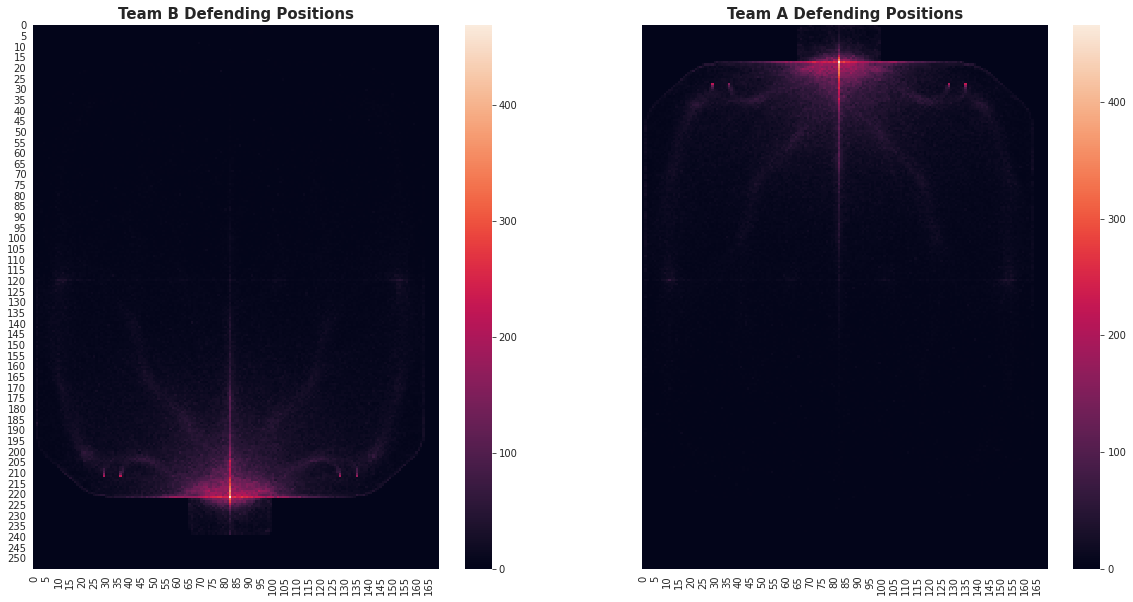

In [13]:
xy_features = [
    "p0_pos_x", "p0_pos_y", "p1_pos_x", "p1_pos_y", "p2_pos_x", "p2_pos_y", "p3_pos_x", "p3_pos_y", 
    "p4_pos_x", "p4_pos_y", "p5_pos_x", "p5_pos_y", "ball_pos_x", "ball_pos_y"
]

train_a_near_scoring_net = train[(train["team_A_scoring_within_10sec"] == 1) & (train["event_time"] > -1.)]

valid_positions = []

for (_, p0_x, p0_y, p1_x, p1_y, p2_x, p2_y, p3_x, p3_y, p4_x, p4_y, p5_x, p5_y, ball_x, ball_y) in train_a_near_scoring_net[xy_features].itertuples():
    if p3_x < 250:
        valid_positions.append((p3_x, p3_y))
    if p4_x < 250:
        valid_positions.append((p4_x, p4_y))
    if p5_x < 250:
        valid_positions.append((p5_x, p5_y))
    # valid_positions.append((ball_x, ball_y))

np_array = np.zeros(shape=(255, 170))
for (x, y) in valid_positions:
    np_array[y, x] += 1.

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

_ = sns.heatmap(np_array, ax=axs[0])
_ = axs[0].grid(False)
_ = axs[0].set_title("Team B Defending Positions", fontweight="bold", size=15)

# Clean up unused variables to save on RAM
del(valid_positions)
del(np_array)
del(train_a_near_scoring_net)
_  = gc.collect()

train_b_near_scoring_net = train[(train["team_B_scoring_within_10sec"] == 1) & (train["event_time"] > -1.)]

valid_positions = []

for (_, p0_x, p0_y, p1_x, p1_y, p2_x, p2_y, p3_x, p3_y, p4_x, p4_y, p5_x, p5_y, ball_x, ball_y) in train_b_near_scoring_net[xy_features].itertuples():
    if p0_x < 250:
        valid_positions.append((p0_x, p0_y))
    if p1_x < 250:
        valid_positions.append((p1_x, p1_y))
    if p2_x < 250:
        valid_positions.append((p2_x, p2_y))
    # valid_positions.append((ball_x, ball_y))

np_array = np.zeros(shape=(255, 170))
for (x, y) in valid_positions:
    np_array[y, x] += 1.
    
_ = sns.heatmap(np_array, ax=axs[1])
_ = axs[1].grid(False)
_ = axs[1].set_title("Team A Defending Positions", fontweight="bold", size=15)

# Clean up unused variables to save on RAM
del(valid_positions)
del(xy_features)
del(np_array)
del(train_b_near_scoring_net)
_  = gc.collect()

### Key Observations About Player Positions

* Team A is trying to score on the net located near the 250 Y position.
* Team B is trying to score on the net located near the 0 Y position.
* Team A and B both tend to cluster near the openings of their nets when defending against potential shots on the goal.

# 2.4 Statistical Breakdown

Let's take a closer look at some of the statistical properties of the various features. Since trying to analyze 21+ million rows is likely going to cause memory problems, we'll examine a random sample of the dataset.

Before we go too far, we'll have to first deal with the null values in the velocity statistics (remember, we already dealt with null values in player and ball positions).Before we go too far, we'll have to first deal with the null values in the velocity statistics (remember, we already dealt with null values in player and ball positions).

In [14]:
velocity_features = [feature for feature in train.columns if feature.endswith("vel_z") or feature.endswith("vel_x") or feature.endswith("vel_y")]
for feature in velocity_features:
    train[feature] = train[feature].fillna(0.0)
    
boost_features = [feature for feature in train.columns if feature.endswith("boost")]
for feature in boost_features:
    train[feature] = train[feature].fillna(0.0)

Now we can look at statistical properties.

In [15]:
features = [
    "ball_pos_x", "ball_pos_y", "ball_pos_z", "ball_vel_x", "ball_vel_y", "ball_vel_z", 
    "p0_pos_x", "p0_pos_y", "p0_pos_z", "p0_vel_x", "p0_vel_y", "p0_vel_z", 
    "p1_pos_x", "p1_pos_y", "p1_pos_z", "p1_vel_x", "p1_vel_y", "p1_vel_z", 
    "p2_pos_x", "p2_pos_y", "p2_pos_z", "p2_vel_x", "p2_vel_y", "p2_vel_z",
    "p3_pos_x", "p3_pos_y", "p3_pos_z", "p3_vel_x", "p3_vel_y", "p3_vel_z", 
    "p4_pos_x", "p4_pos_y", "p4_pos_z", "p4_vel_x", "p4_vel_y", "p4_vel_z",
    "p5_pos_x", "p5_pos_y", "p5_pos_z", "p5_vel_x", "p5_vel_y", "p5_vel_z",
    "p0_boost", "p1_boost", "p2_boost", "p3_boost", "p4_boost", "p5_boost",
    "boost0_timer", "boost1_timer", "boost2_timer", "boost3_timer", "boost4_timer", "boost5_timer",
]

train_subset = train.sample(frac=0.1, random_state=2022)
train_subset = train_subset[(train_subset["p0_pos_x"] != 250) & (train_subset["p1_pos_x"] != 250) & (train_subset["p2_pos_x"] != 250) & (train_subset["p3_pos_x"] != 250) & (train_subset["p4_pos_x"] != 250) & (train_subset["p5_pos_x"] != 250) & (train_subset["ball_pos_x"] != 250)]
train_subset[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
ball_pos_x,2008988.000000,81.814569,48.429021,2.000000,38.000000,82.000000,126.000000,162.000000
ball_pos_y,2008988.000000,119.273723,59.583514,15.000000,66.000000,119.000000,172.000000,223.000000
ball_pos_z,2008988.000000,15.196996,10.489451,1.000000,6.000000,14.000000,23.000000,39.000000
ball_vel_x,2008988.000000,0.025001,23.208954,-106.969803,-15.667200,-0.000000,15.729400,115.130402
ball_vel_y,2008988.000000,0.046950,28.032513,-109.208397,-21.834200,0.000000,21.892799,99.559998
ball_vel_z,2008988.000000,0.072826,12.304045,-59.694599,-7.684600,0.000000,7.610400,85.952995
p0_pos_x,2008988.000000,81.832775,45.044994,1.000000,45.000000,82.000000,118.000000,163.000000
p0_pos_y,2008988.000000,99.831950,58.051781,0.000000,48.000000,96.000000,142.000000,238.000000
p0_pos_z,2008988.000000,3.079788,6.496838,0.000000,0.000000,0.000000,2.000000,40.000000
p0_vel_x,2008988.000000,-0.004774,21.030125,-46.000000,-15.915000,0.000200,15.895000,46.000000


In [16]:
# Clean up unused variables to save on RAM
del(train_subset)
_  = gc.collect()

### Key Observations About Statistical Information

* The X position of each player has a mean that centers around the center of the field. This makes sense, since we assume that a random sample of players will tend to play both the right and left hand sides of the field somewhat equally. No big spikes exist, which suggests that there are no anomalies in the play field that may force players to favor one side over the other.
* The Y position of the players has a mean depending on their team. Players on team A tend to have a mean closer to their end of the field, while players on team B have a mean closer to their end instead. This makes sense, since after scoring, player positions get reset to positions on their own half of the field before a kickoff occurs.
* The Z position of players is interesting. On average, players remain on the ground most of the time. In fact, players remain firmly on the ground even within the 75% percentile, suggesting that jumps are somewhat infrequent or short in duration. Surprisingly, player data maxes out to the top of the play field in the 100% percentile, suggesting that while players don't spend a lot of time there, it is possible that they can reach and possibly drive on the ceiling.
* Ball position appears to be similar to that of player position with respect to X and Y axis. In the Z axis however, we see the ball is even distributed across the vertical space. This makes sense since the ball when hit may have more variable trajectories, and therefore may travel through a much wider range of Z positions.

# 2.5 P-Value Test

While looking at features visually will tell us some interesting information, we can also use p-value testing to see if a feature has a net impact on a simple regression model. This method is controversial in that it likely doesn't provide a correct look at what features are informative. Our null hypothesis is that the feature impacts the target variable of `team_A_scoring_within_10sec` or `team_B_scoring_within_10sec`. In this case, anything with a p-value greater than 0.05 means we reject that hypothesis, and can potentially flag it for removal. Again, due to memory pressure, we'll go with the subset of our training data for analysis.

### P-Value Test for `team_A_scoring_within_10sec`

In [17]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

train_subset = train.sample(frac=0.05, random_state=2022)

x = add_constant(train_subset[features])
model = OLS(train_subset["team_A_scoring_within_10sec"], x).fit()

pvalues = pd.DataFrame(model.pvalues)
pvalues.reset_index(inplace=True)
pvalues.rename(columns={0: "pvalue", "index": "feature"}, inplace=True)
pvalues.style.background_gradient(cmap='YlOrRd')

,feature,pvalue
0,const,0.000000
1,ball_pos_x,0.546890
2,ball_pos_y,0.000000
3,ball_pos_z,0.000000
4,ball_vel_x,0.485858
5,ball_vel_y,0.000000
6,ball_vel_z,0.000000
7,p0_pos_x,0.350290
8,p0_pos_y,0.000000
9,p0_pos_z,0.000000


Some interesting observations:

* The P-Value test reveals that any X velocity or X position is likely uninformative with respect to whether team A scores within the next 10 seconds. This reflects the nature of the playing field. The goals are oriented at either end of the Y axis, so the ball's Y position and the player's Y positions are very much related to whether the team can score. The height of the net in the Z axis determines how high up the ball can go before it goes over the net, so again, the ball's Z position and other player's Z positions relate to whether the team can score. The X axis however, is largely unimportant. This suggests the ball can originate from either the left or right of the goal and still have a very good chance of going into the goal. 

In [18]:
# Clean up unused variables to save on RAM
del(train_subset)
del(pvalues)
del(model)
_  = gc.collect()

### P-Value Test for `team_B_scoring_within_10sec`

In [19]:
train_subset = train.sample(frac=0.05, random_state=2022)

x = add_constant(train_subset[features])
model = OLS(train_subset["team_B_scoring_within_10sec"], x).fit()

pvalues = pd.DataFrame(model.pvalues)
pvalues.reset_index(inplace=True)
pvalues.rename(columns={0: "pvalue", "index": "feature"}, inplace=True)
pvalues.style.background_gradient(cmap='YlOrRd')

,feature,pvalue
0,const,0.000000
1,ball_pos_x,0.138961
2,ball_pos_y,0.000000
3,ball_pos_z,0.000000
4,ball_vel_x,0.249222
5,ball_vel_y,0.000000
6,ball_vel_z,0.000000
7,p0_pos_x,0.347195
8,p0_pos_y,0.000000
9,p0_pos_z,0.034640


Some interesting observations:

* The same applies to the team B scoring data as to team A scoring within 10 seconds. The X position and X velocity of the ball and players do not matter. Again, it's the Y and Z position and velocities that matter. 

In [20]:
# Clean up unused variables to save on RAM
del(train_subset)
del(pvalues)
del(model)
_  = gc.collect()

### Key Observations About P-Value Tests

* We should experiment with removing the following features:
 * `p0_pos_x`
 * `p0_vel_x`
 * `p1_pos_x`
 * `p1_vel_x`
 * `p2_pos_x`
 * `p2_vel_x`
 * `p3_pos_x`
 * `p3_vel_x`
 * `p4_pos_x`
 * `p4_vel_x`
 * `p5_pos_x`
 * `p5_vel_x`
 * `ball_pos_x`
 * `ball_vel_x`

# 2.6 Spearman Correlation

We should also check to see what variables are correlated to one another. Spearman correlation does not make assumptions about distribution types or linearity. With Spearman correlation, we have values that range from -1 to +1. Values around either extreme end mean a neagative or positive correlation, while those around 0 mean no correlation exists.

### Spearman Correlation for `team_A_scoring_within_10sec`

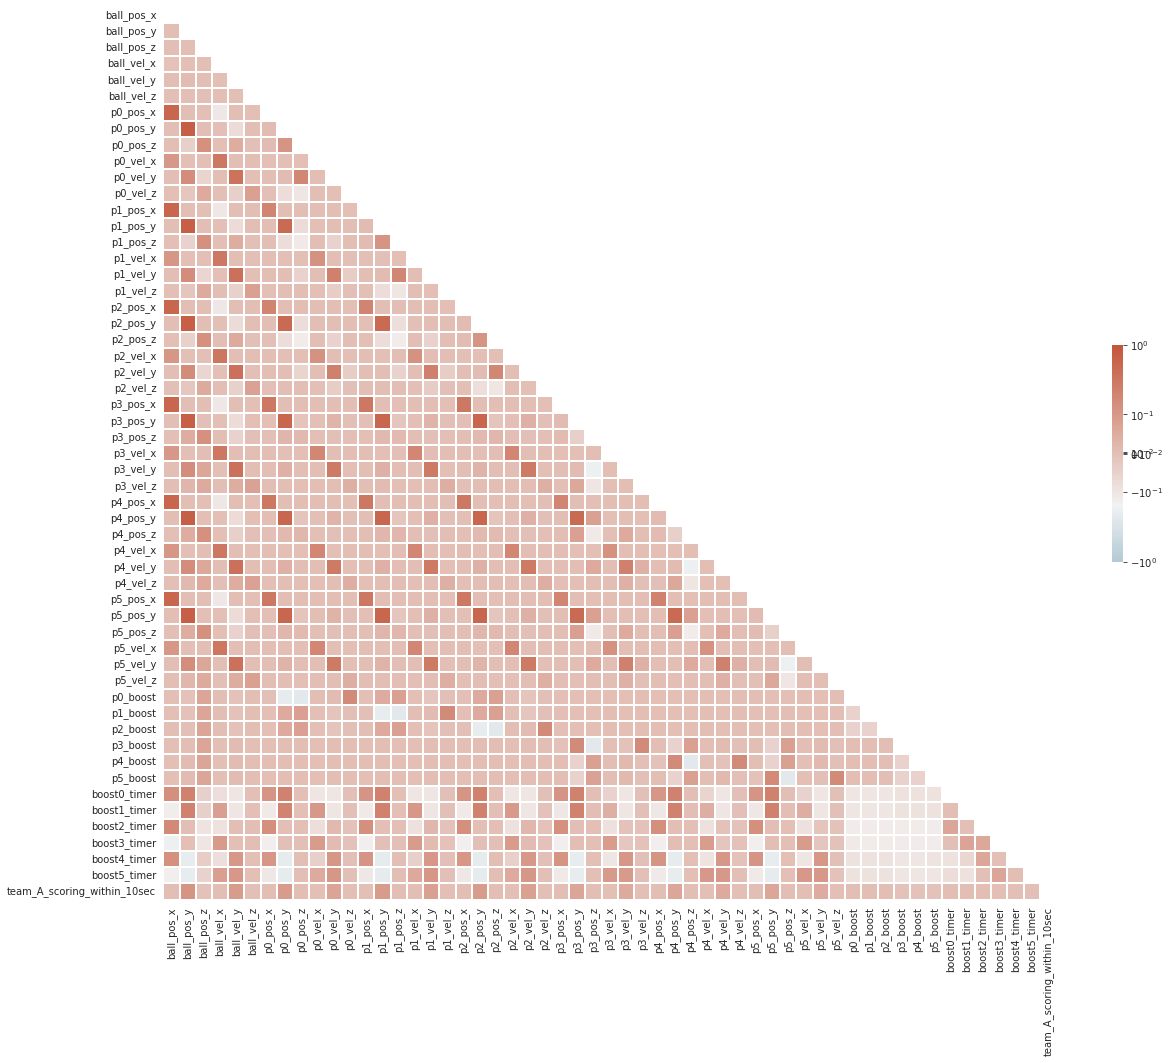

In [21]:
columns_to_check = features.copy()
columns_to_check.append("team_A_scoring_within_10sec")
train_subset = train.sample(frac=0.05, random_state=2022)
correlation_matrix = train_subset[columns_to_check].corr(method="spearman")

from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar_kws={"shrink": .2},
    norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-1.0, vmax=1.0, base=10),
)

# Clean up unused variables to save on RAM
del(train_subset)
del(columns_to_check)
del(correlation_matrix)
_  = gc.collect()

Some observations:

* Each of the player's X, Y, and Z positions have a strong positive correlation with the ball's X, Y, and Z positions. This makes sense since players typically follow the ball around the field in order to take possession of it to take shots on the goal.
* The player's X and Y positions are also positively correlated with one another. Again, this makes sense. Players on the same team will tend to remain close to one another, since they can help each other gain control of the ball or defend their goal. 
* The player's Z positions are not positively or negatively correlated. This means that movement in the Z axis by any player is pretty much of their own volition, and is independent of what other players do.
* There is some weak positive correlation between the Y positions of the ball and players in conjunction with the target variable. This makes sense, since most of the players will be close to the goal when it happens.

### Spearman Correlation for `team_B_scoring_within_10sec`

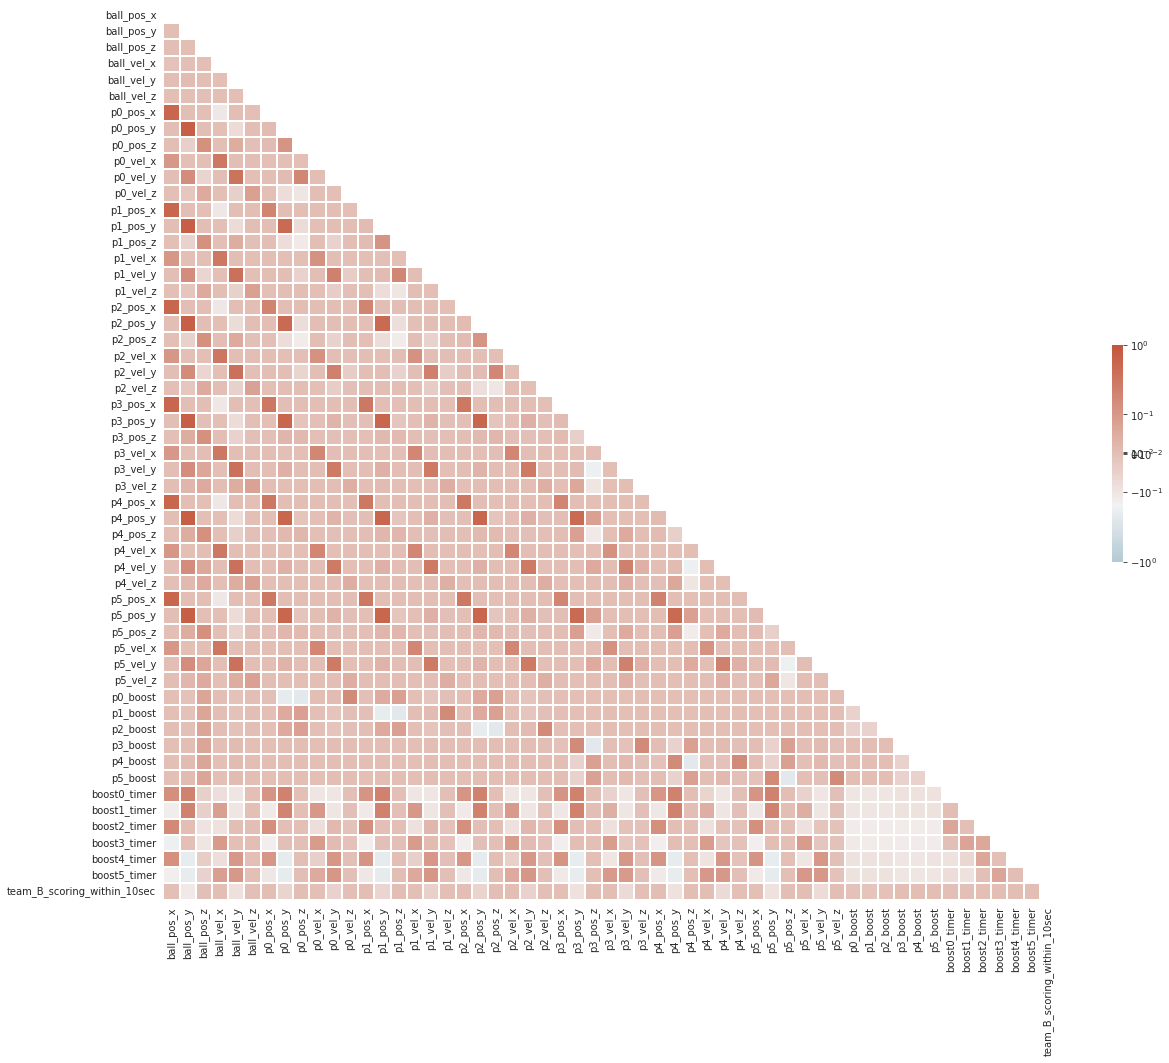

In [22]:
columns_to_check = features.copy()
columns_to_check.append("team_B_scoring_within_10sec")
train_subset = train.sample(frac=0.05, random_state=2022)
correlation_matrix = train_subset[columns_to_check].corr(method="spearman")

from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar_kws={"shrink": .2},
    norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-1.0, vmax=1.0, base=10),
)

# Clean up unused variables to save on RAM
del(train_subset)
del(columns_to_check)
del(correlation_matrix)
_  = gc.collect()

Again, we have the same observations as above with regards to correlation between variables and targets.

### Key Observations About Spearman Correlations

* There is strong positive correlation between ball position and player positions along the X, Y, and Z axis. This makes sense since the players will be close to where the ball is.
* There is weakly positive correlation between the target variable and the Y position of both the ball and the players. This suggests that the Y coordinates may be slightly more informative than other features.

# 2.7 Class Balance

As always, it is a good idea to take a look at class balance to see whether there is a skew in the target variable that we are trying to predict. 

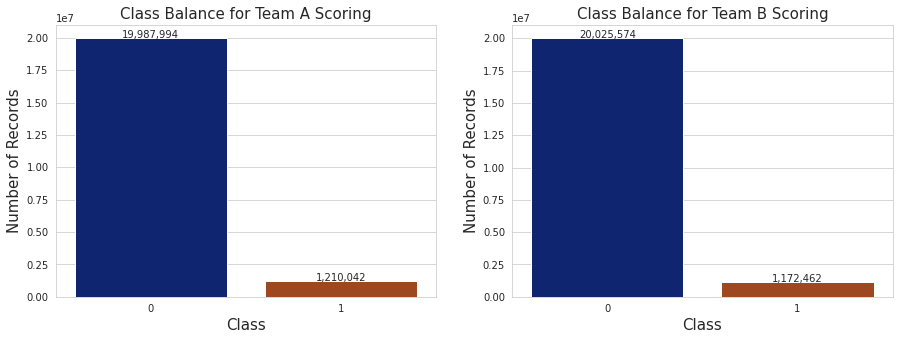

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

counts_a = pd.DataFrame(train["team_A_scoring_within_10sec"].value_counts())
_ = sns.barplot(x=counts_a.index, y=counts_a.team_A_scoring_within_10sec, ax=axs[0], **sns_params)
for p in axs[0].patches:
    axs[0].text(x=p.get_x()+(p.get_width()/2), y=p.get_height(), s="{:,d}".format(round(p.get_height())), ha="center")
_ = axs[0].set_title("Class Balance for Team A Scoring", fontsize=15)
_ = axs[0].set_ylabel("Number of Records", fontsize=15)
_ = axs[0].set_xlabel("Class", fontsize=15)

counts_b = pd.DataFrame(train["team_B_scoring_within_10sec"].value_counts())
_ = sns.barplot(x=counts_b.index, y=counts_b.team_B_scoring_within_10sec, ax=axs[1], **sns_params)
for p in axs[1].patches:
    axs[1].text(x=p.get_x()+(p.get_width()/2), y=p.get_height(), s="{:,d}".format(round(p.get_height())), ha="center")
_ = axs[1].set_title("Class Balance for Team B Scoring", fontsize=15)
_ = axs[1].set_ylabel("Number of Records", fontsize=15)
_ = axs[1].set_xlabel("Class", fontsize=15)

del(counts_a)
del(counts_b)
_ = gc.collect()

### Key Observations about Class Balance

* Both scoring metrics are very imbalanced with respect to the negative class. In both cases, the positive examples account for approximately 5% of the data available. 
* In order to help with the class balance problem, we can perform _data augmentation_. In slightly more detail, to add more examples for team A, we can take all the positive examples from team B, swap the players from team B to team A, flip the X and Y coordinates, and add the result to the training set. 

# 3 Simple Models

Now that we have examined the data in more detail, we should look at building some simple models to understand how various features may impact our ability to make predictions.

# 3.1 Unmodified LightGBM

We'll start by building a simple LightGBM model without any feature engineering. We're using LightGBM here as a decently performing GBDT that is CPU bound so that we don't have to use any of our allocated GPU time just for simple EDA purposes.

-- Fold 1:
              precision    recall  f1-score   support

    A Scores       0.77      0.06      0.12     20288
    B Scores       0.74      0.06      0.11     19560
    No Score       0.89      1.00      0.94    313453

    accuracy                           0.89    353301
   macro avg       0.80      0.37      0.39    353301
weighted avg       0.88      0.89      0.85    353301

-- Fold 2:
              precision    recall  f1-score   support

    A Scores       0.75      0.06      0.11     20289
    B Scores       0.78      0.06      0.11     19560
    No Score       0.89      1.00      0.94    313452

    accuracy                           0.89    353301
   macro avg       0.81      0.37      0.39    353301
weighted avg       0.88      0.89      0.85    353301

-- Fold 3:
              precision    recall  f1-score   support

    A Scores       0.74      0.06      0.11     20288
    B Scores       0.78      0.06      0.12     19560
    No Score       0.89      1.00      0.9

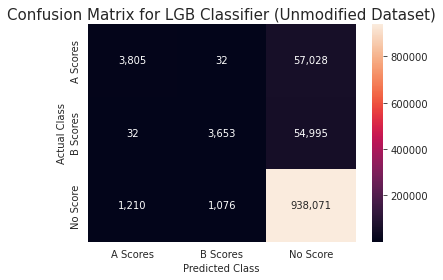

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from lightgbm import log_evaluation
from lightgbm import early_stopping

# Follow the competition's metric calculation
def rocket_logloss(target, probas):
    observation_loss_a = sum([(1 if int(truth) == 1 else 0)*log(proba[0]) + (1-(1 if int(truth) == 1 else 0))*log(1-proba[0]) for truth, proba in zip(target, probas)]) / len(target)
    observation_loss_b = sum([(1 if int(truth) == 2 else 0)*log(proba[1]) + (1-(1 if int(truth) == 2 else 0))*log(1-proba[1]) for truth, proba in zip(target, probas)]) / len(target)
    return -(0.5 * (observation_loss_a + observation_loss_b))

train["combined_target"] = train[["team_A_scoring_within_10sec", "team_B_scoring_within_10sec"]].apply(lambda x: "{}{}".format(str(x.team_A_scoring_within_10sec), str(x.team_B_scoring_within_10sec)), axis=1)
train["combined_target"] = train["combined_target"].apply(lambda x: "1" if x == "10" else x)
train["combined_target"] = train["combined_target"].apply(lambda x: "2" if x == "01" else x)
train["combined_target"] = train["combined_target"].apply(lambda x: "3" if x == "00" else x)
train["combined_target"] = train["combined_target"].apply(lambda x: int(x))
train["combined_target"] = train["combined_target"].astype(np.int8)

train_subset = train.sample(frac=0.05, random_state=2022)
target = train_subset["combined_target"]

class_labels = ["A Scores", "B Scores", "No Score"]

cv_rounds = 3

k_fold = StratifiedKFold(
    n_splits=cv_rounds,
    random_state=2021,
    shuffle=True,
)

train_preds = np.zeros(len(train_subset.index), )
train_probas = np.zeros((len(train_subset.index), 3), )

for fold, (train_index, test_index) in enumerate(k_fold.split(train_subset[features], target)):
    print("-- Fold {}:".format(fold+1))

    x_train = train_subset[features].iloc[train_index]
    y_train = target.iloc[train_index]

    x_valid = train_subset[features].iloc[test_index]
    y_valid = target.iloc[test_index]

    model = LGBMClassifier(
        random_state=2022,
        n_estimators=2000,
        verbose=-1,
        metric="multi_logloss",
        objective="multiclass",
    )
    model.fit(
        x_train,
        y_train,
        eval_set=[(x_valid, y_valid)],
        callbacks=[log_evaluation(period=0), early_stopping(50, verbose=False)],
    )
    train_oof_preds = model.predict(x_valid)
    train_oof_probas = model.predict_proba(x_valid)
    train_preds[test_index] = train_oof_preds
    train_probas[test_index] = train_oof_probas
    
    del(model)
    gc.collect()
    
    print("{}".format(classification_report(y_valid, train_oof_preds, target_names=class_labels)))
    
unmodified_rocket_logloss = rocket_logloss(target, train_probas)

print("-- Overall:")
print("{}".format(classification_report(target, train_preds, target_names=class_labels)))
print("-- Model log loss: {}".format(log_loss(target, train_probas)))
print("-- Competition log loss: {}".format(unmodified_rocket_logloss))

# Show the confusion matrix
confusion = confusion_matrix(target, train_preds)
ax = sns.heatmap(confusion, annot=True, fmt=",d", xticklabels=class_labels, yticklabels=class_labels)
_ = ax.set_title("Confusion Matrix for LGB Classifier (Unmodified Dataset)", fontsize=15)
_ = ax.set_ylabel("Actual Class")
_ = ax.set_xlabel("Predicted Class")

# Delete unused variables to save RAM
del(train_preds)
del(train_probas)
del(confusion)
_ = gc.collect()

# 3.2 Removing X Positions

As indicated by the P-Value tests above, it may be possible to remove X position information without impacting model performance. This would purely be a memory saving feature.

-- Fold 1:
              precision    recall  f1-score   support

    A Scores       0.77      0.06      0.12     20288
    B Scores       0.75      0.06      0.11     19560
    No Score       0.89      1.00      0.94    313453

    accuracy                           0.89    353301
   macro avg       0.80      0.37      0.39    353301
weighted avg       0.88      0.89      0.85    353301

-- Fold 2:
              precision    recall  f1-score   support

    A Scores       0.75      0.06      0.12     20289
    B Scores       0.78      0.06      0.11     19560
    No Score       0.89      1.00      0.94    313452

    accuracy                           0.89    353301
   macro avg       0.81      0.37      0.39    353301
weighted avg       0.88      0.89      0.85    353301

-- Fold 3:
              precision    recall  f1-score   support

    A Scores       0.74      0.06      0.11     20288
    B Scores       0.77      0.06      0.12     19560
    No Score       0.89      1.00      0.9

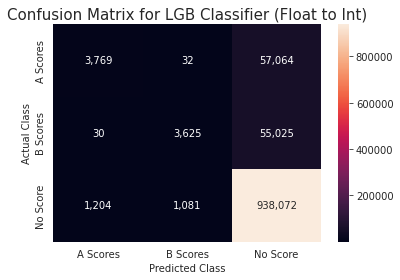

In [25]:
features.remove("p0_pos_x")
features.remove("p1_pos_x")
features.remove("p2_pos_x")
features.remove("p3_pos_x")
features.remove("p4_pos_x")
features.remove("p5_pos_x")

k_fold = StratifiedKFold(
    n_splits=cv_rounds,
    random_state=2021,
    shuffle=True,
)

train_preds = np.zeros(len(train_subset.index), )
train_probas = np.zeros((len(train_subset.index), 3), )

for fold, (train_index, test_index) in enumerate(k_fold.split(train_subset[features], target)):
    print("-- Fold {}:".format(fold+1))

    x_train = train_subset[features].iloc[train_index]
    y_train = target.iloc[train_index]

    x_valid = train_subset[features].iloc[test_index]
    y_valid = target.iloc[test_index]

    model = LGBMClassifier(
        random_state=2022,
        n_estimators=2000,
        verbose=-1,
        metric="multi_logloss",
        objective="multiclass",
    )
    model.fit(
        x_train,
        y_train,
        eval_set=[(x_valid, y_valid)],
        callbacks=[log_evaluation(period=0), early_stopping(50, verbose=False)],
    )
    train_oof_preds = model.predict(x_valid)
    train_oof_probas = model.predict_proba(x_valid)
    train_preds[test_index] = train_oof_preds
    train_probas[test_index] = train_oof_probas
    
    del(model)
    gc.collect()
    
    print("{}".format(classification_report(y_valid, train_oof_preds, target_names=class_labels)))
    
removed_x_pos_rocket_logloss = rocket_logloss(target, train_probas)

print("-- Overall:")
print("{}".format(classification_report(target, train_preds, target_names=class_labels)))
print("-- Model log loss: {}".format(log_loss(target, train_probas)))
print("-- Competition log loss: {}".format(removed_x_pos_rocket_logloss))

# Show the confusion matrix
confusion = confusion_matrix(target, train_preds)
ax = sns.heatmap(confusion, annot=True, fmt=",d", xticklabels=class_labels, yticklabels=class_labels)
_ = ax.set_title("Confusion Matrix for LGB Classifier (Float to Int)", fontsize=15)
_ = ax.set_ylabel("Actual Class")
_ = ax.set_xlabel("Predicted Class")

# Delete unused variables to save RAM
del(train_preds)
del(train_probas)
del(confusion)
_ = gc.collect()

Overall, removing X positions from the dataset increases log loss, thus we should leave in the values regardless of what the P-Test suggests.

# 3.3 Counting Players in Play

Keeping track of what players are still in play may also help with keeping track of score information. We can keep a simple count of how many players are in play at any given moment based on their substituted X position when they were null (demolished).

In [26]:
train_subset["team_A_num_players"] = train_subset[["p0_pos_x", "p1_pos_x", "p2_pos_x"]].apply(
    lambda x: (1 if x.p0_pos_x != 250 else 0) + (1 if x.p1_pos_x != 250 else 0) + (1 if x.p2_pos_x != 250 else 0)
, axis=1)

train_subset["team_B_num_players"] = train_subset[["p3_pos_x", "p4_pos_x", "p5_pos_x"]].apply(
    lambda x: (1 if x.p3_pos_x != 250 else 0) + (1 if x.p4_pos_x != 250 else 0) + (1 if x.p5_pos_x != 250 else 0)
, axis=1)

-- Fold 1:
              precision    recall  f1-score   support

    A Scores       0.77      0.06      0.12     20288
    B Scores       0.75      0.06      0.11     19560
    No Score       0.89      1.00      0.94    313453

    accuracy                           0.89    353301
   macro avg       0.81      0.37      0.39    353301
weighted avg       0.88      0.89      0.85    353301

-- Fold 2:
              precision    recall  f1-score   support

    A Scores       0.75      0.06      0.12     20289
    B Scores       0.78      0.06      0.11     19560
    No Score       0.89      1.00      0.94    313452

    accuracy                           0.89    353301
   macro avg       0.81      0.37      0.39    353301
weighted avg       0.88      0.89      0.85    353301

-- Fold 3:
              precision    recall  f1-score   support

    A Scores       0.76      0.06      0.12     20288
    B Scores       0.78      0.06      0.12     19560
    No Score       0.89      1.00      0.9

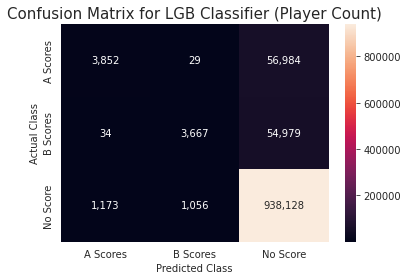

In [27]:
features.append("p0_pos_x")
features.append("p1_pos_x")
features.append("p2_pos_x")
features.append("p3_pos_x")
features.append("p4_pos_x")
features.append("p5_pos_x")
features.append("team_A_num_players")
features.append("team_B_num_players")

k_fold = StratifiedKFold(
    n_splits=cv_rounds,
    random_state=2021,
    shuffle=True,
)

train_preds = np.zeros(len(train_subset.index), )
train_probas = np.zeros((len(train_subset.index), 3), )

for fold, (train_index, test_index) in enumerate(k_fold.split(train_subset[features], target)):
    print("-- Fold {}:".format(fold+1))

    x_train = train_subset[features].iloc[train_index]
    y_train = target.iloc[train_index]

    x_valid = train_subset[features].iloc[test_index]
    y_valid = target.iloc[test_index]

    model = LGBMClassifier(
        random_state=2022,
        n_estimators=2000,
        verbose=-1,
        metric="multi_logloss",
        objective="multiclass",
    )
    model.fit(
        x_train,
        y_train,
        eval_set=[(x_valid, y_valid)],
        callbacks=[log_evaluation(period=0), early_stopping(50, verbose=False)],
    )
    train_oof_preds = model.predict(x_valid)
    train_oof_probas = model.predict_proba(x_valid)
    train_preds[test_index] = train_oof_preds
    train_probas[test_index] = train_oof_probas
    
    del(model)
    gc.collect()
    
    print("{}".format(classification_report(y_valid, train_oof_preds, target_names=class_labels)))
    
player_count_rocket_logloss = rocket_logloss(target, train_probas)

print("-- Overall:")
print("{}".format(classification_report(target, train_preds, target_names=class_labels)))
print("-- Model log loss: {}".format(log_loss(target, train_probas)))
print("-- Competition log loss: {}".format(player_count_rocket_logloss))

# Show the confusion matrix
confusion = confusion_matrix(target, train_preds)
ax = sns.heatmap(confusion, annot=True, fmt=",d", xticklabels=class_labels, yticklabels=class_labels)
_ = ax.set_title("Confusion Matrix for LGB Classifier (Player Count)", fontsize=15)
_ = ax.set_ylabel("Actual Class")
_ = ax.set_xlabel("Predicted Class")

# Delete unused variables to save RAM
del(train_preds)
del(train_probas)
del(confusion)
_ = gc.collect()

Counting the number of players in play has a slightly lower log loss than our baseline of an unmodified LGBM model.

# 3.4 Indicating Player Positions

An additional piece of information that could be useful is to indicate where in the field the players are located. For example, we can record if the defender is in their own goal posts. This may give an indication as to whether players are in a position to strike or defend.

-- Fold 1:
              precision    recall  f1-score   support

    A Scores       0.77      0.07      0.12     20288
    B Scores       0.75      0.06      0.12     19560
    No Score       0.89      1.00      0.94    313453

    accuracy                           0.89    353301
   macro avg       0.80      0.38      0.39    353301
weighted avg       0.88      0.89      0.85    353301

-- Fold 2:
              precision    recall  f1-score   support

    A Scores       0.74      0.06      0.12     20289
    B Scores       0.76      0.06      0.12     19560
    No Score       0.89      1.00      0.94    313452

    accuracy                           0.89    353301
   macro avg       0.80      0.37      0.39    353301
weighted avg       0.88      0.89      0.85    353301

-- Fold 3:
              precision    recall  f1-score   support

    A Scores       0.75      0.06      0.12     20288
    B Scores       0.78      0.06      0.12     19560
    No Score       0.89      1.00      0.9

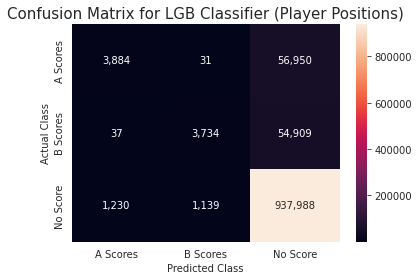

In [28]:
features.remove("team_A_num_players")
features.remove("team_B_num_players")

train_subset['team_b_players_in_goal'] = train_subset.apply(
    lambda x: (1 if x.p3_pos_y > 222 else 0) + (1 if x.p4_pos_y > 222 else 0) + (1 if x.p5_pos_y > 222 else 0)
, axis=1)
train_subset['team_a_players_in_goal'] = train_subset.apply(
    lambda x: (1 if x.p0_pos_y < 13 else 0) + (1 if x.p1_pos_y < 13 else 0) + (1 if x.p2_pos_y < 13 else 0)
, axis=1)
train_subset['team_b_players_defending'] = train_subset.apply(
    lambda x: (1 if x.p3_pos_y <= 222 and x.p3_pos_y > 185 else 0) + (1 if x.p4_pos_y <= 222 and x.p4_pos_y > 185 else 0) + (1 if x.p5_pos_y <= 222 and x.p5_pos_y > 185 else 0)
, axis=1)
train_subset['team_a_players_defending'] = train_subset.apply(
    lambda x: (1 if x.p0_pos_y >= 13 and x.p0_pos_y < 75 else 0) + (1 if x.p1_pos_y >= 13 and x.p1_pos_y < 75 else 0) + (1 if x.p2_pos_y >= 13 and x.p2_pos_y < 75 else 0)
, axis=1)
train_subset['team_b_players_striking'] = train_subset.apply(
    lambda x: (1 if x.p3_pos_y >= 13 and x.p3_pos_y < 75 else 0) + (1 if x.p4_pos_y >= 13 and x.p4_pos_y < 75 else 0) + (1 if x.p5_pos_y >= 13 and x.p5_pos_y < 75 else 0)
, axis=1)
train_subset['team_a_players_striking'] = train_subset.apply(
    lambda x: (1 if x.p0_pos_y <= 222 and x.p0_pos_y > 185 else 0) + (1 if x.p1_pos_y <= 222 and x.p1_pos_y > 185 else 0) + (1 if x.p2_pos_y <= 222 and x.p2_pos_y > 185 else 0)
, axis=1)

features.append("team_b_players_in_goal")
features.append("team_a_players_in_goal")
features.append("team_b_players_defending")
features.append("team_a_players_defending")
features.append("team_b_players_striking")
features.append("team_a_players_striking")

k_fold = StratifiedKFold(
    n_splits=cv_rounds,
    random_state=2021,
    shuffle=True,
)

train_preds = np.zeros(len(train_subset.index), )
train_probas = np.zeros((len(train_subset.index), 3), )

for fold, (train_index, test_index) in enumerate(k_fold.split(train_subset[features], target)):
    print("-- Fold {}:".format(fold+1))

    x_train = train_subset[features].iloc[train_index]
    y_train = target.iloc[train_index]

    x_valid = train_subset[features].iloc[test_index]
    y_valid = target.iloc[test_index]

    model = LGBMClassifier(
        random_state=2022,
        n_estimators=2000,
        verbose=-1,
        metric="multi_logloss",
        objective="multiclass",
    )
    model.fit(
        x_train,
        y_train,
        eval_set=[(x_valid, y_valid)],
        callbacks=[log_evaluation(period=0), early_stopping(50, verbose=False)],
    )
    train_oof_preds = model.predict(x_valid)
    train_oof_probas = model.predict_proba(x_valid)
    train_preds[test_index] = train_oof_preds
    train_probas[test_index] = train_oof_probas
    
    del(model)
    gc.collect()
    
    print("{}".format(classification_report(y_valid, train_oof_preds, target_names=class_labels)))
    
position_rocket_logloss = rocket_logloss(target, train_probas)

print("-- Overall:")
print("{}".format(classification_report(target, train_preds, target_names=class_labels)))
print("-- Model log loss: {}".format(log_loss(target, train_probas)))
print("-- Competition log loss: {}".format(position_rocket_logloss))

# Show the confusion matrix
confusion = confusion_matrix(target, train_preds)
ax = sns.heatmap(confusion, annot=True, fmt=",d", xticklabels=class_labels, yticklabels=class_labels)
_ = ax.set_title("Confusion Matrix for LGB Classifier (Player Positions)", fontsize=15)
_ = ax.set_ylabel("Actual Class")
_ = ax.set_xlabel("Predicted Class")

# Delete unused variables to save RAM
del(train_preds)
del(train_probas)
del(confusion)
_ = gc.collect()

# 3.5 Extrapolating Positions

Given that we have velocity information relating to each player and the ball, we can extrapolate the next move (or next few moves) for the player. This may help give us clues as to what we think is going to happen next. This extrapolation is necessarily limited however, given the fact that we don't have acceleration information, or much in the way (currently) of calculating the physical forces of the game world. This means that our extrapolation will become wildly inaccurate the further into the future we attempt to make predictions. However, it may provide an immediate boost one or two steps into the future.

In [29]:
print(": Extrapolating new player 0 positions")
train_subset["p0_pos_x_step1"] = train_subset.apply(lambda x: int(x.p0_pos_x + (x.p0_vel_x / 10.)), axis=1)
train_subset["p0_pos_y_step1"] = train_subset.apply(lambda x: int(x.p0_pos_y + (x.p0_vel_y / 10.)), axis=1)
train_subset["p0_pos_z_step1"] = train_subset.apply(lambda x: int(x.p0_pos_z + (x.p0_vel_z / 10.)), axis=1)

print(": Extrapolating new player 1 positions")
train_subset["p1_pos_x_step1"] = train_subset.apply(lambda x: int(x.p1_pos_x + (x.p1_vel_x / 10.)), axis=1)
train_subset["p1_pos_y_step1"] = train_subset.apply(lambda x: int(x.p1_pos_y + (x.p1_vel_y / 10.)), axis=1)
train_subset["p1_pos_z_step1"] = train_subset.apply(lambda x: int(x.p1_pos_z + (x.p1_vel_z / 10.)), axis=1)

print(": Extrapolating new player 2 positions")
train_subset["p2_pos_x_step1"] = train_subset.apply(lambda x: int(x.p2_pos_x + (x.p2_vel_x / 10.)), axis=1)
train_subset["p2_pos_y_step1"] = train_subset.apply(lambda x: int(x.p2_pos_y + (x.p2_vel_y / 10.)), axis=1)
train_subset["p2_pos_z_step1"] = train_subset.apply(lambda x: int(x.p2_pos_z + (x.p2_vel_z / 10.)), axis=1)

print(": Extrapolating new player 3 positions")
train_subset["p3_pos_x_step1"] = train_subset.apply(lambda x: int(x.p3_pos_x + (x.p3_vel_x / 10.)), axis=1)
train_subset["p3_pos_y_step1"] = train_subset.apply(lambda x: int(x.p3_pos_y + (x.p3_vel_y / 10.)), axis=1)
train_subset["p3_pos_z_step1"] = train_subset.apply(lambda x: int(x.p3_pos_z + (x.p3_vel_z / 10.)), axis=1)

print(": Extrapolating new player 4 positions")
train_subset["p4_pos_x_step1"] = train_subset.apply(lambda x: int(x.p4_pos_x + (x.p4_vel_x / 10.)), axis=1)
train_subset["p4_pos_y_step1"] = train_subset.apply(lambda x: int(x.p4_pos_y + (x.p4_vel_y / 10.)), axis=1)
train_subset["p4_pos_z_step1"] = train_subset.apply(lambda x: int(x.p4_pos_z + (x.p4_vel_z / 10.)), axis=1)

print(": Extrapolating new player 5 positions")
train_subset["p5_pos_x_step1"] = train_subset.apply(lambda x: int(x.p5_pos_x + (x.p5_vel_x / 10.)), axis=1)
train_subset["p5_pos_y_step1"] = train_subset.apply(lambda x: int(x.p5_pos_y + (x.p5_vel_y / 10.)), axis=1)
train_subset["p5_pos_z_step1"] = train_subset.apply(lambda x: int(x.p5_pos_z + (x.p5_vel_z / 10.)), axis=1)

print(": Extrapolating new ball positions")
train_subset["ball_pos_x_step1"] = train_subset.apply(lambda x: int(x.ball_pos_x + (x.ball_vel_x / 10.)), axis=1)
train_subset["ball_pos_y_step1"] = train_subset.apply(lambda x: int(x.ball_pos_y + (x.ball_vel_y / 10.)), axis=1)
train_subset["ball_pos_z_step1"] = train_subset.apply(lambda x: int(x.ball_pos_z + (x.ball_vel_z / 10.)), axis=1)

: Extrapolating new player 0 positions
: Extrapolating new player 1 positions
: Extrapolating new player 2 positions
: Extrapolating new player 3 positions
: Extrapolating new player 4 positions
: Extrapolating new player 5 positions
: Extrapolating new ball positions


In [30]:
features.remove("team_b_players_in_goal")
features.remove("team_a_players_in_goal")
features.remove("team_b_players_defending")
features.remove("team_a_players_defending")
features.remove("team_b_players_striking")
features.remove("team_a_players_striking")

features.append("p0_pos_x_step1")
features.append("p0_pos_y_step1")
features.append("p0_pos_z_step1")
features.append("p1_pos_x_step1")
features.append("p1_pos_y_step1")
features.append("p1_pos_z_step1")
features.append("p2_pos_x_step1")
features.append("p2_pos_y_step1")
features.append("p2_pos_z_step1")
features.append("p3_pos_x_step1")
features.append("p3_pos_y_step1")
features.append("p3_pos_z_step1")
features.append("p4_pos_x_step1")
features.append("p4_pos_y_step1")
features.append("p4_pos_z_step1")
features.append("p5_pos_x_step1")
features.append("p5_pos_y_step1")
features.append("p5_pos_z_step1")
features.append("ball_pos_x_step1")
features.append("ball_pos_y_step1")
features.append("ball_pos_z_step1")

-- Fold 1:
              precision    recall  f1-score   support

    A Scores       0.77      0.07      0.12     20288
    B Scores       0.75      0.06      0.12     19560
    No Score       0.89      1.00      0.94    313453

    accuracy                           0.89    353301
   macro avg       0.81      0.38      0.39    353301
weighted avg       0.88      0.89      0.85    353301

-- Fold 2:
              precision    recall  f1-score   support

    A Scores       0.77      0.07      0.12     20289
    B Scores       0.79      0.06      0.12     19560
    No Score       0.89      1.00      0.94    313452

    accuracy                           0.89    353301
   macro avg       0.82      0.38      0.39    353301
weighted avg       0.88      0.89      0.85    353301

-- Fold 3:
              precision    recall  f1-score   support

    A Scores       0.75      0.07      0.12     20288
    B Scores       0.77      0.07      0.12     19560
    No Score       0.89      1.00      0.9

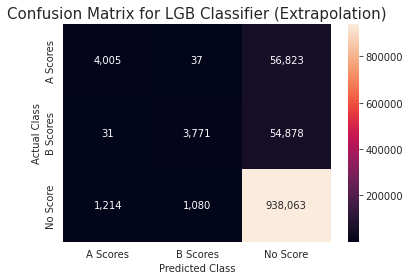

In [31]:
k_fold = StratifiedKFold(
    n_splits=cv_rounds,
    random_state=2021,
    shuffle=True,
)

train_preds = np.zeros(len(train_subset.index), )
train_probas = np.zeros((len(train_subset.index), 3), )

for fold, (train_index, test_index) in enumerate(k_fold.split(train_subset[features], target)):
    print("-- Fold {}:".format(fold+1))

    x_train = train_subset[features].iloc[train_index]
    y_train = target.iloc[train_index]

    x_valid = train_subset[features].iloc[test_index]
    y_valid = target.iloc[test_index]

    model = LGBMClassifier(
        random_state=2022,
        n_estimators=2000,
        verbose=-1,
        metric="multi_logloss",
        objective="multiclass",
    )
    model.fit(
        x_train,
        y_train,
        eval_set=[(x_valid, y_valid)],
        callbacks=[log_evaluation(period=0), early_stopping(50, verbose=False)],
    )
    train_oof_preds = model.predict(x_valid)
    train_oof_probas = model.predict_proba(x_valid)
    train_preds[test_index] = train_oof_preds
    train_probas[test_index] = train_oof_probas
    
    del(model)
    gc.collect()
    
    print("{}".format(classification_report(y_valid, train_oof_preds, target_names=class_labels)))
    
extra_rocket_logloss = rocket_logloss(target, train_probas)

print("-- Overall:")
print("{}".format(classification_report(target, train_preds, target_names=class_labels)))
print("-- Model log loss: {}".format(log_loss(target, train_probas)))
print("-- Competition log loss: {}".format(extra_rocket_logloss))

# Show the confusion matrix
confusion = confusion_matrix(target, train_preds)
ax = sns.heatmap(confusion, annot=True, fmt=",d", xticklabels=class_labels, yticklabels=class_labels)
_ = ax.set_title("Confusion Matrix for LGB Classifier (Extrapolation)", fontsize=15)
_ = ax.set_ylabel("Actual Class")
_ = ax.set_xlabel("Predicted Class")

# Delete unused variables to save RAM
del(train_preds)
del(train_probas)
del(confusion)
_ = gc.collect()

# 3.6 Comparison of Approaches

Overall, we can take a look at what the difference is between the approaches in terms of log loss.

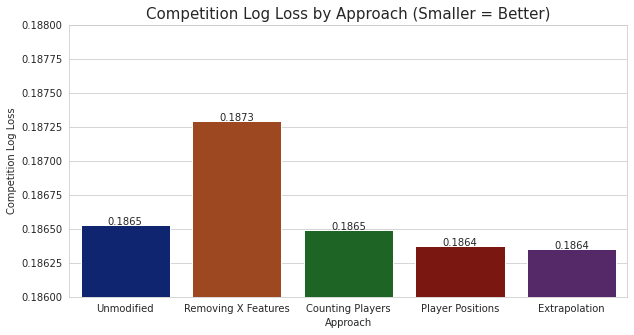

In [32]:
bar, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(
    x=["Unmodified", "Removing X Features", "Counting Players", "Player Positions", "Extrapolation"],
    y=[
        unmodified_rocket_logloss,
        removed_x_pos_rocket_logloss,
        player_count_rocket_logloss,
        position_rocket_logloss,
        extra_rocket_logloss,
    ],
    ax=ax,
    **sns_params
)
_ = ax.set_title("Competition Log Loss by Approach (Smaller = Better)", fontsize=15)
_ = ax.set_xlabel("Approach")
_ = ax.set_ylabel("Competition Log Loss")
_ = ax.set(ylim=(0.186, 0.188))
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x()+(p.get_width()/2),
        y=height,
        s="{:.4f}".format(height),
        ha="center"
    )

# 4 Future Work

From the data provided, there is plenty of opportunities for some future work. Specifically:

* A better model for future predictions of positions is warranted. Given that it provided an advantage to the model, a newer way of calculating positions in relation to the actual definition of the field is needed. Additionally, future increments of player positions more than a single step ahead could provide further boost to the model. 
* Player collisions should also be modeled. Collisions could indicate a change in the player's direction or heading and may be important information to capture.
* Chains of related rows could be determined by extrapolating player positions, and then finding rows in the data that match what those future positions should be. This would provide us a really good opportunity to use LSTM neural networks to take into account say 10 time slices from the board. This would likely greatly increase the accuracy of our machine learning models, at the expense of having to do a lot of pre-processing to match up current frames with future frames. 
* Stacking models is likely to provide increases in performance. 
* Model hyper-parameter tuning is likely to provide increases in performance.

If you found this EDA useful, please consider upvoting!